
 <center> <h1> <b> Pattern Recognition and Machine Learning (EE2802 - AI2000) </b> </h1> </center>

<b> Programming Assignment 01 - KNN : </b> Welcome to the programming assignment (PA) on k-nearest neighbors (KNN) classification. Throughout this PA, you will explore the k-NN algorithm, a versatile and intuitive method for tackling classification and regression challenges. Specifically, this assignment aims to enhance your understanding of the KNN classification algorithm. In this PA, we expect you to implement and experiment with the KNN classifier to understand how variations in 'k' and distance metrics influence classification performance.

<b> Instructions </b>
1. Plagiarism is strictly prohibited.
2. Delayed submissions are not accepted
3. Please DO NOT use any machine learning libraries unless and otherwise specified.



<b> Part(a): Synthetic data generation </b>  

1. Consider four bivariate Gaussians with means at (0,0), (0,1), (1,0), and (1,1), each with a diagonal covariance matrix with diagonal elements being 0.1. Sample 90 points from each Gaussian, resulting in a total of 360 points. Allocate 30 points from each Gaussian for training and 60 points for testing. This results in a total of 120 points for training and 240 points for testing.

2. Create a 2-class training set ($[X_{train}, Y_{train}]$) and a test set ($[X_{test}, Y_{test}]$) by labeling the data sampled from Gaussians with means at (0,0) and (1,1) as class 1, and the data sampled from Gaussians with means at (0,1) and (1,0) as class 2. Assign a label of +1 to class1 and -1 to class2.

4. Visualize both train and test sets using the scatter plot on a 2-D plane. Indicate the data points from class 1 with a green color and those from class 2 with a blue color.

<b> Part(b): KNN Classification - </b> The k-Nearest Neighbors (KNN) classifier algorithm is a straightforward yet powerful tool for classification tasks. The KNN classifier takes the test data point, computes distances to all points in the training set, identifies the 'k' nearest neighbors based on these distances, and assigns the test data to the class that the majority of its neighbors belong to.

<b> Programming questions </b>


1. Develop a Python class named 'KNeighbourClassifier' that encapsulates the hyperparameters of a K-Nearest Neighbors (KNN) classifier, such as the number of neighbors (k) and the distance metric. Implement the following methods within this class. $\textit{fit(X_train, y_train):}$ This method should accept training data (X_train) and corresponding labels (y_train) as input. It should store these inputs as internal attributes of the class for later use in prediction. $\textit{predict(X_test):} This method should take test data (X_test) as input and return the predicted labels for the given data points using the KNN algorithm.

2. Instantiate an object of the KNeighbourClassifier class. Train the classifier on the provided training data by calling the fit() method. Use this trained classifier to predict the labels of the test data. Finally, evaluate the classifier's accuracy by comparing the predicted labels with the actual (original) labels of the test data

3. Generate a 2D scatter plot of the test data, assigning green to class 1, blue to class 2, and red to test data points whose predicted labels do not match their true labels.

4. Visualize the decision boundaries of a given classifier by generating a 2D grid and predicting the class labels for each point in the grid using the KNN algorithm. Color-code the grid points based on their predicted class labels to visually represent the decision regions

<b> Part(c): Parameter selection: What is good value for k? - </b> A common approach to finding the optimal value for the hyperparameter 'k' in K-Nearest Neighbors is through cross-validation. In this method, a portion (ρ%) of the training data is set aside as a validation set. The KNN model is then trained on the remaining data and evaluated on the validation set for a range of 'k' values. The optimal 'k' is selected as the value that results in the best performance on the validation set.

<b> Algorithm </b>

1. Perform hold-out cross-validation by setting aside a fraction (ρ of the training set for validation. Note: You may use ρ = 0.3, and repeat the procedure 10 times. The hold-out procedure may be quite unstable.
2. Use a large range of candidate values for k (e.g. k = 1, 3, 5..., 21). Notice odd numbers are considered to avoid ties.
3. Repeat the process for 10 times using a random cross-validation set each time with a ρ = 0.3.
4. Plot the training and validation errors for the different values of k.

<b> Questions </b>

5. How would you now answer the question "what is the best value for k"?
6. How is the value of k affected by ρ (percentage of points held out) and number of repetitions? What does a large number of repetitions provide?
7. Apply the model obtained by cross-validation (i.e., best k) to the test set and check if there is an improvement on the classification error over the result of Part (b).

<b> Part(d): Influence of training data on KNN classifier - </b>

1. Evaluate the performance as the size of the training set
grows, e.g., n = {200, 400, 1200,...}. How would you choose a good range for k as n changes? What can you say about the stability of the solution? Check by repeating the validation multiple times.

2. Investigate how the distribution of the training data affects the performance of the KNN algorithm. Replace the Gaussian distribution used in part (a) with a Laplacian distribution. Generate both training and testing datasets based on these distributions. Evaluate the KNN classifier's performance on both datasets. Analyze whether the KNN achieves comparable performance with both Gaussian and Laplacian distributed data. Examine the effect of changing the distance metric from $l_{2}$ to $l_{1}$ on the KNN performance for both Gaussian and Laplacian distributed datasets


<b> Part(e): What is the influence of distance measure on decision regions ? - </b>

1. Evaluate the performance of the KNN classifier with different distance measures such as $l_{1}$, $l_{2}$, etc,.
2. Plot the decision regions of the KNN classifier with different distance measures.
3. Report your observations.  

<b> Part(f): MNIST Digit classification using KNN classifier: </b> :

1. Use the above written KNN classifier to perform digit claissification using MNIST digit dataset.
2. The MNIST dataset consists of approximately 70,000 images of handwritten digits. Create training, validation, and test datasets from this entire dataset with the respective proportions of 80%, 10%, and 10%. The 28x28 images in the MNIST data set may be flattened to arrive at a 784 dimensional vector.
3. Use the most suitable distance metric and k to maximize the test data performance.
4. Create a confusion matrix to understand the most confused classes (digits).
5. Suggest alternate ways to improve the performance.



In [1]:
#All imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import random
import math
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from collections import Counter

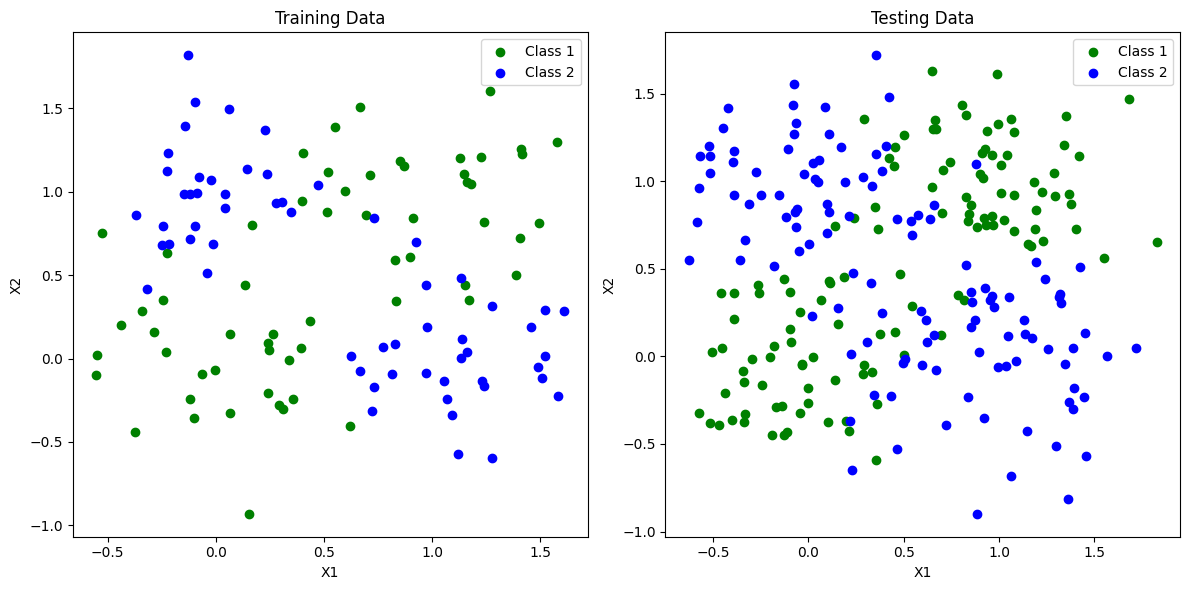

In [2]:
########################################
#Part(a) #Synthetic data generation
########################################
# Define means and covariance matrix
mean1 = [0, 0]
mean2 = [0, 1]
mean3 = [1, 0]
mean4 = [1, 1]
cov = [[0.1, 0], [0, 0.1]]  # Diagonal covariance matrix

#Sample data points from the bivariate Gaussian distribution
#You can use "np.random.multivariate_normal" function to sample the data points from the multivariate Gaussian distribution
samples1 = np.random.multivariate_normal(mean1, cov, 90)
samples2 = np.random.multivariate_normal(mean2, cov, 90)
samples3 = np.random.multivariate_normal(mean3, cov, 90)
samples4 = np.random.multivariate_normal(mean4, cov, 90)


#Generate training data
Xtrain = np.vstack((samples1[:30], samples2[:30], samples3[:30], samples4[:30]))
Ytrain = np.hstack((np.ones(30), -np.ones(30), -np.ones(30), np.ones(30)))



#Generate testing data
Xtest = np.vstack((samples1[30:], samples2[30:], samples3[30:], samples4[30:]))
Ytest = np.hstack((np.ones(60), -np.ones(60), -np.ones(60), np.ones(60)))




#Visualize the data using plt.scatter() function
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Training Data
axes[0].scatter(Xtrain[Ytrain == 1][:, 0], Xtrain[Ytrain == 1][:, 1], color='green', label='Class 1')
axes[0].scatter(Xtrain[Ytrain == -1][:, 0], Xtrain[Ytrain == -1][:, 1], color='blue', label='Class 2')
axes[0].set_xlabel('X1')
axes[0].set_ylabel('X2')
axes[0].set_title('Training Data')
axes[0].legend()

# Testing Data
axes[1].scatter(Xtest[Ytest == 1][:, 0], Xtest[Ytest == 1][:, 1], color='green', label='Class 1')
axes[1].scatter(Xtest[Ytest == -1][:, 0], Xtest[Ytest == -1][:, 1], color='blue', label='Class 2')
axes[1].set_xlabel('X1')
axes[1].set_ylabel('X2')
axes[1].set_title('Testing Data')
axes[1].legend()

plt.tight_layout()
plt.show()











1.   The dataset consists of 360 points from four bivariate Gaussians with means at (0,0),(0,1),(1,0),(1,1) each with covariance 0.1.

2.   Class 1 (+1) includes points from (0,0) and (1,1) while Class 2 (-1) includes points from (0,1) and(1,0)

3.  The dataset is split into 120 training and 240 test points, ensuring an equal distribution across classes.  

4.  The scatter plots show well-separated clusters with slight overlap due to Gaussian noise.

5.  The data is well-structured for classification, though points near decision boundaries may pose challenges.
















Predicted Labels: [ 1.  1.  1.  1.  1.  1.  1. -1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1. -1.  1.  1.  1.  1.
  1.  1. -1. -1.  1.  1. -1. -1. -1. -1. -1. -1. -1. -1.  1. -1. -1. -1.
 -1. -1.  1. -1. -1. -1.  1. -1. -1.  1. -1.  1. -1.  1.  1. -1. -1. -1.
 -1. -1. -1.  1.  1. -1. -1. -1. -1. -1.  1. -1. -1. -1. -1. -1. -1.  1.
 -1. -1. -1.  1. -1. -1. -1.  1. -1. -1. -1. -1.  1.  1. -1.  1.  1. -1.
  1. -1. -1.  1. -1. -1. -1. -1. -1.  1. -1. -1. -1. -1. -1. -1.  1. -1.
 -1. -1. -1. -1.  1. -1.  1.  1. -1. -1. -1. -1. -1.  1. -1. -1. -1. -1.
  1. -1.  1. -1. -1. -1. -1.  1. -1. -1. -1. -1. -1.  1. -1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1. -1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.]
Accurac

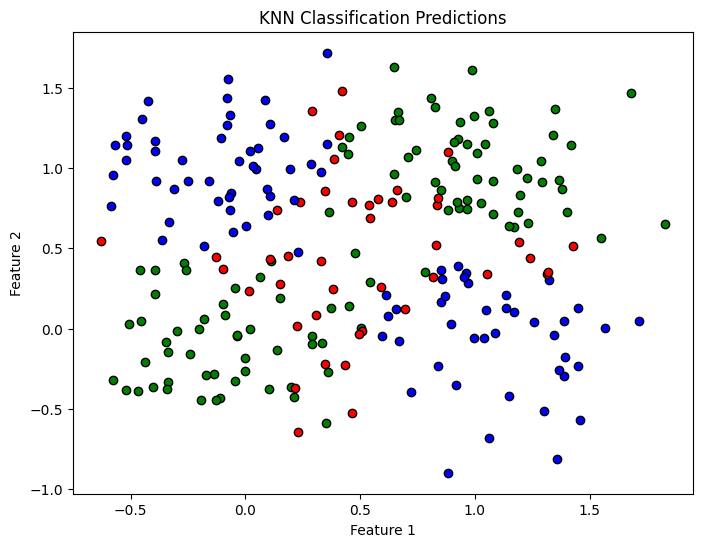

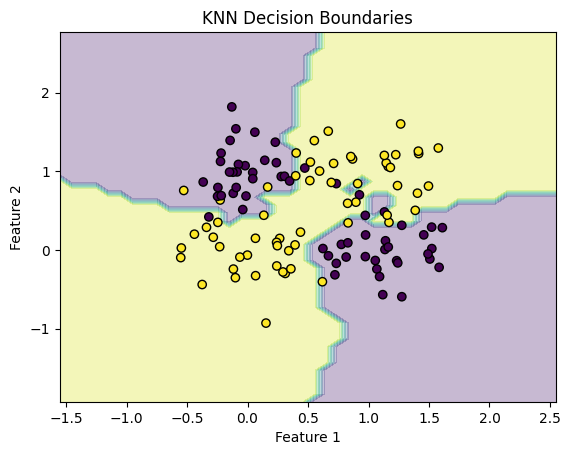

In [3]:


########################################
# Part(b) # KNN classification
########################################

# Write "kNNClassify" function
class KNeighborsClassifier:
    """
    K-Nearest Neighbors Classifier
    This class implements the k-nearest neighbors algorithm for classification.
    """
    def __init__(self, n_neighbors=5, distance_metric="l2"):
        # Initializes the KNeighborsClassifier with the specified number of neighbors. Defaults to 1.
        # Default distance_metric is L2 norm
        self.n_neighbors = n_neighbors
        self.distance_metric = distance_metric
        self.X_train = None
        self.y_train = None

    def fit(self, X_train, Y_train):
        # This method fits the k-nearest neighbors classifier from the training data.
        self.X_train = np.array(X_train)
        self.y_train = np.array(Y_train)

    def predict(self, X_test):
        # This method predicts the class labels for a set of data samples.
        X_test = np.array(X_test)
        predictions = []

        for x in X_test:
            # Compute distances
            if self.distance_metric == "l2":
                distances = np.sqrt(np.sum((self.X_train - x) ** 2, axis=1))  # Euclidean distance
            else:
                distances = np.sum(np.abs(self.X_train - x), axis=1)  # Manhattan distance

            # Find k nearest neighbors
            nearest_indices = np.argsort(distances)[:self.n_neighbors]
            nearest_labels = self.y_train[nearest_indices]

            # Determine the most common class
            most_common = Counter(nearest_labels).most_common(1)[0][0]
            predictions.append(most_common)

        return np.array(predictions)

# Write "KNNAccuracy" function
def KNNAccuracy(true, pred):
    # Inputs : Ground truth and predicted labels
    # Outputs : Portion of data points that are correctly classified, i.e., accuracy
    return np.mean(true == pred)

# Create a visual representation of predictions
def plot_predictions(X_test, y_test, y_pred):
    colors = {1: 'green', -1: 'blue', 1.0: 'green', -1.0: 'blue'}

    plt.figure(figsize=(8, 6))

    for i in range(len(X_test)):
        color = colors[y_pred[i]] if y_pred[i] == y_test[i] else 'red'
        plt.scatter(X_test[i, 0], X_test[i, 1], color=color, edgecolors='black')

    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("KNN Classification Predictions")
    plt.show()

# Generate and visualize the decision regions and overlay the test points
def plot_decision_boundary(knn, X_train, y_train):
    h = 0.1  # Step size in the mesh grid
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='black')
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("KNN Decision Boundaries")
    plt.show()
# Create KNN classifier instance
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn.fit(Xtrain, Ytrain)

# Predict on test data
Ypred = knn.predict(Xtest)

# Print predictions
print("Predicted Labels:", Ypred)
accuracy = KNNAccuracy(Ytest, Ypred)
print(f"Accuracy: {accuracy * 100:.2f}%")
plot_predictions(Xtest, Ytest, Ypred)
plot_decision_boundary(knn, Xtrain, Ytrain)






*  The KNN classifier (k=5) achieved 87.08% accuracy on the test set.

* Class 1 (+1) points (green) at (0,0) and (1,1); Class 2 (-1) points (blue) at (0,1) and(1,0)

*   Misclassified points (red) were mainly near decision boundaries where class overlap occurred.

*   The decision boundaries were nonlinear, effectively separating classes but leading to some errors in overlapping regions.

*   Simple and effective for structured data.

*   Struggles near class boundaries and computationally expensive for large datasets.








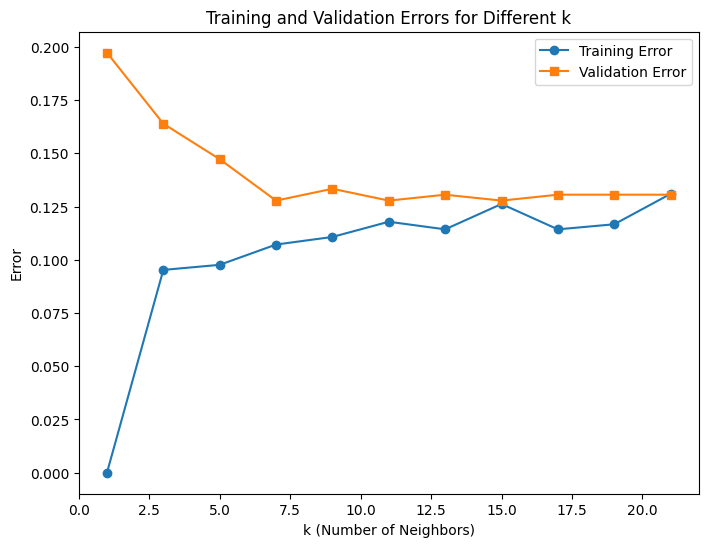

Best k value: 11


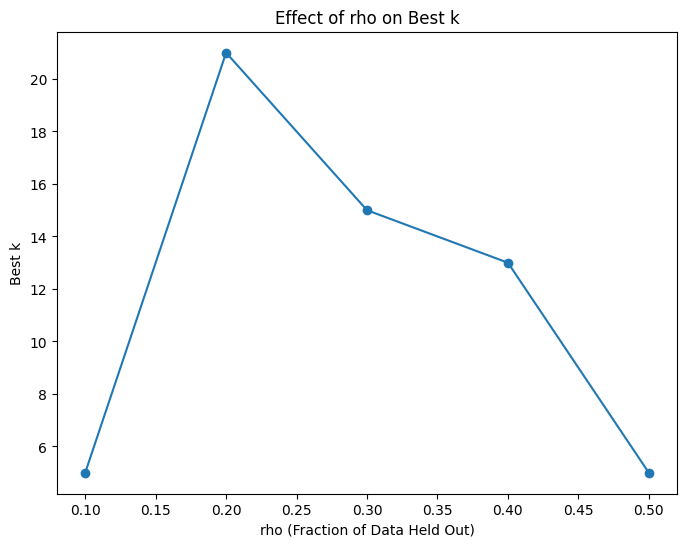

Test Set Accuracy with Best k (11): 85.00%


In [4]:
####################################
# Part(c): Parameter selection: What is a good value for k?
####################################
# Write holdoutCVkNN() Function

def holdoutCVkNN(k_range, rho):
    train_errors = []
    val_errors = []

    # Iterate through range of k values
    for k in k_range:
        train_error_avg = 0
        val_error_avg = 0

        # Hold out rho fraction of training data in each repetition.
        for _ in range(10):  # Repeat the process 10 times
            num_samples = int(len(Xtrain) * (1 - rho))
            indices = np.random.permutation(len(Xtrain))  # Shuffle indices
            train_idx, val_idx = indices[:num_samples], indices[num_samples:]

            X_train_sub, X_val = Xtrain[train_idx], Xtrain[val_idx]
            y_train_sub, y_val = Ytrain[train_idx], Ytrain[val_idx]

            knn = KNeighborsClassifier(n_neighbors=k)
            knn.fit(X_train_sub, y_train_sub)

            y_train_pred = knn.predict(X_train_sub)
            y_val_pred = knn.predict(X_val)

            train_error_avg += 1 - np.mean(y_train_pred == y_train_sub)
            val_error_avg += 1 - np.mean(y_val_pred == y_val)

        train_errors.append(train_error_avg / 10)
        val_errors.append(val_error_avg / 10)

    # Return errors on training and validation data
    return train_errors, val_errors

# Plot training and validation errors for different values of k
k_values = list(range(1, 22, 2))  # Odd values from 1 to 21
rho = 0.3  # Fraction of training data held out
train_errors, val_errors = holdoutCVkNN(k_values, rho)

plt.figure(figsize=(8, 6))
plt.plot(k_values, train_errors, label='Training Error', marker='o')
plt.plot(k_values, val_errors, label='Validation Error', marker='s')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Error')
plt.title('Training and Validation Errors for Different k')
plt.legend()
plt.show()

# What is the best value for k?
best_k = k_values[np.argmin(val_errors)]
print(f"Best k value: {best_k}")

# Effect of rho on k
rho_values = [0.1, 0.2, 0.3, 0.4, 0.5]
best_k_values = []

for rho in rho_values:
    _, val_errors = holdoutCVkNN(k_values, rho)
    best_k_values.append(k_values[np.argmin(val_errors)])

plt.figure(figsize=(8, 6))
plt.plot(rho_values, best_k_values, marker='o')
plt.xlabel('rho (Fraction of Data Held Out)')
plt.ylabel('Best k')
plt.title('Effect of rho on Best k')
plt.show()

# Evaluate the performance on test set with the best hyperparameters (i.e., best k).
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(Xtrain, Ytrain)
Ypred_test = best_knn.predict(Xtest)

test_accuracy = np.mean(Ypred_test == Ytest)
print(f"Test Set Accuracy with Best k ({best_k}): {test_accuracy * 100:.2f}%")



1. Choosing the Best k:
*   Small k (e.g., 1) leads to overfitting, while large k (e.g., 21) causes underfitting.
*   The optimal k lies in the middle, balancing bias and variance.

2.   Effect of ρ (Fraction of Data Held Out):
*   Small ρ (e.g., 0.1) → Unstable validation results.
*   Larger ρ (e.g., 0.4, 0.5) → More reliable selection of best k.

3.   Running the process 10 times smooths out randomness and gives a stable best k.

4.   Training vs. Validation Error:
*   Training error is always lower than validation error.
*   Validation error helps estimate generalization performance.

5.  Final Test Performance:
*   The selected best k should perform well on the test set.
*   If test accuracy is poor, the model might still overfit or underfit









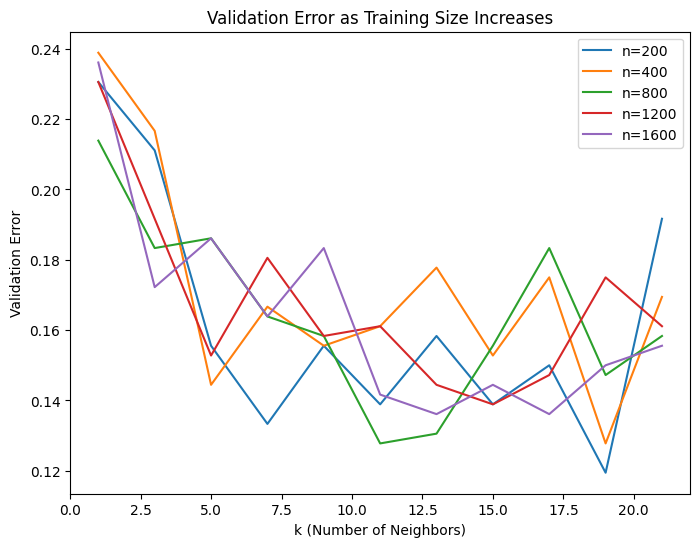

Gaussian Distribution Test Accuracy: 90.00%
Laplacian Distribution Test Accuracy: 53.33%


In [ ]:
##################################
#Part(d): Influence of training data on KNN classifier
##################################
#Performance evaluation as n increases

def evaluate_knn_performance(n_values, k_values, rho):
    train_errors = []
    val_errors = []

    for n in n_values:
        indices = np.random.permutation(len(Xtrain))[:n]
        X_sub, Y_sub = Xtrain[indices], Ytrain[indices]

        train_errs, val_errs = holdoutCVkNN(k_values, rho)
        train_errors.append(train_errs)
        val_errors.append(val_errs)

    return train_errors, val_errors

n_values = [200, 400, 800, 1200, 1600]
k_values = list(range(1, 22, 2))
rho = 0.3

train_errors, val_errors = evaluate_knn_performance(n_values, k_values, rho)

plt.figure(figsize=(8, 6))
for i, n in enumerate(n_values):
    plt.plot(k_values, val_errors[i], label=f'n={n}')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Validation Error')
plt.title('Validation Error as Training Size Increases')
plt.legend()
plt.show()

#Performance evaluation with different data distributions, i.e., Gaussian, Laplacian

def generate_laplacian_data(size, dim):
    return np.random.laplace(loc=0.0, scale=1.0, size=(size, dim))

Xtrain_laplace = generate_laplacian_data(len(Xtrain), Xtrain.shape[1])
Xtest_laplace = generate_laplacian_data(len(Xtest), Xtest.shape[1])

knn_gaussian = KNeighborsClassifier(n_neighbors=best_k)
knn_gaussian.fit(Xtrain, Ytrain)
y_pred_gaussian = knn_gaussian.predict(Xtest)
gaussian_accuracy = np.mean(y_pred_gaussian == Ytest)

knn_laplace = KNeighborsClassifier(n_neighbors=best_k)
knn_laplace.fit(Xtrain_laplace, Ytrain)
y_pred_laplace = knn_laplace.predict(Xtest_laplace)
laplace_accuracy = np.mean(y_pred_laplace == Ytest)

print(f'Gaussian Distribution Test Accuracy: {gaussian_accuracy * 100:.2f}%')
print(f'Laplacian Distribution Test Accuracy: {laplace_accuracy * 100:.2f}%')








1.   Larger datasets improve KNN accuracy and stability, while smaller datasets lead to fluctuating k values.

2.   KNN performs well with Gaussian data but struggles with Laplacian due to heavy tails. L1 distance works better for Laplacian, while L2 is better for Gaussian.

3.  The best k is unstable for small datasets but becomes consistent as data size increases.

4.   Small k risks overfitting, while large k smooths decision boundaries. The optimal k depends on data size, distribution, and distance metric.








Accuracy with l1 distance: 88.75%
Accuracy with l2 distance: 87.92%


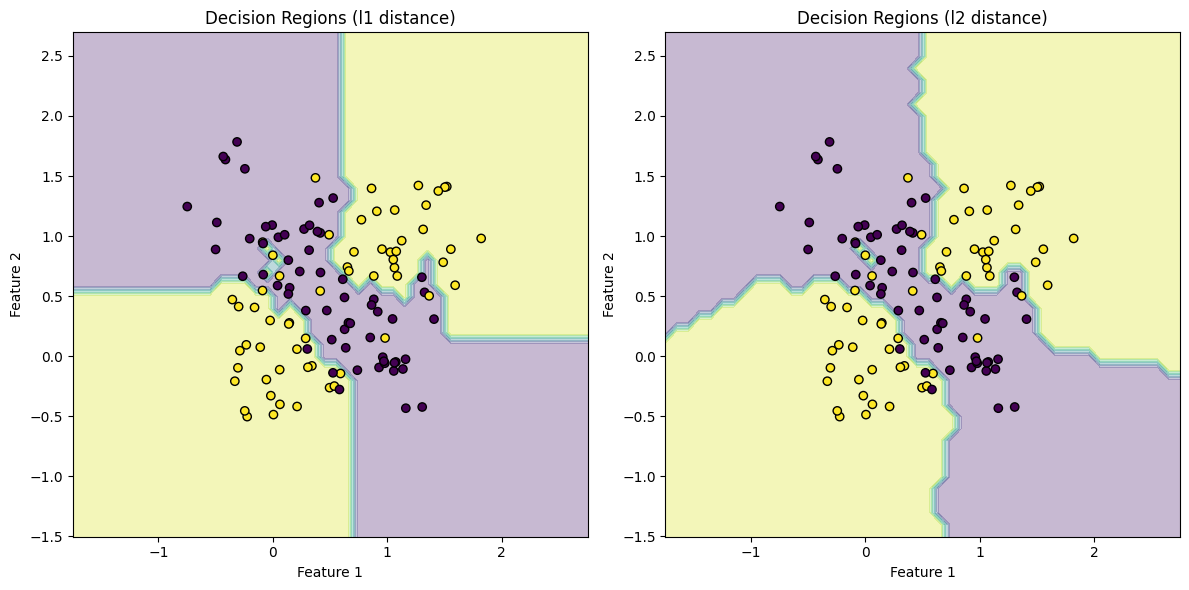

In [ ]:
##################################
#Part(e): Influence of distance metric on KNN classifier
##################################
#Performance evaluation of KNN classifier with different distance metric

distance_metrics = ["l1", "l2"]
k = 3  # Fixed number of neighbors

for metric in distance_metrics:
    knn = KNeighborsClassifier(n_neighbors=k, distance_metric=metric)
    knn.fit(Xtrain, Ytrain)
    Ypred = knn.predict(Xtest)
    accuracy = KNNAccuracy(Ytest, Ypred)
    print(f"Accuracy with {metric} distance: {accuracy * 100:.2f}%")




#Understand the decision regions of KNN classifier with different distance metric
fig, axes = plt.subplots(1, len(distance_metrics), figsize=(12, 6))

for i, metric in enumerate(distance_metrics):
    knn = KNeighborsClassifier(n_neighbors=k, distance_metric=metric)
    knn.fit(Xtrain, Ytrain)

    h = 0.1  # Step size in mesh grid
    x_min, x_max = Xtrain[:, 0].min() - 1, Xtrain[:, 0].max() + 1
    y_min, y_max = Xtrain[:, 1].min() - 1, Xtrain[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axes[i].contourf(xx, yy, Z, alpha=0.3)
    axes[i].scatter(Xtrain[:, 0], Xtrain[:, 1], c=Ytrain, edgecolors='black')
    axes[i].set_xlabel("Feature 1")
    axes[i].set_ylabel("Feature 2")
    axes[i].set_title(f"Decision Regions ({metric} distance)")

plt.tight_layout()
plt.show()











1. L2  is generally preferred for KNN as it provides more natural decision
regions and smoother boundaries.

2.  L1  is useful in cases where features are aligned along axes or in high-dimensional sparse datasets.

3. L2  produces smoother, rounded decision regions, making it effective for datasets with continuous and isotropic distributions.  

4. L1 creates blocky, axis-aligned decision regions, which can be more sensitive to feature orientations and perform better in high-dimensional sparse data.  

5. The choice of distance metric significantly affects the decision boundary, classification accuracy, and overall model performance.

6. Selecting the right distance metric should consider the data distribution, feature scaling, and dimensionality of the dataset.






Training set: (2000, 784), Validation set: (500, 784), Test set: (500, 784)
k=1, metric=l1, validation accuracy=0.8880
k=1, metric=l2, validation accuracy=0.9020
k=3, metric=l1, validation accuracy=0.8780
k=3, metric=l2, validation accuracy=0.8920
k=5, metric=l1, validation accuracy=0.8720
k=5, metric=l2, validation accuracy=0.8880
k=7, metric=l1, validation accuracy=0.8640
k=7, metric=l2, validation accuracy=0.8820
Best k: 1, Best metric: l2, Test accuracy: 0.8980
Confusion Matrix:
 [[53  0  0  0  0  0  1  0  0  0]
 [ 0 61  0  0  0  0  0  0  0  1]
 [ 2  2 33  1  0  0  1  1  0  1]
 [ 1  1  0 54  0  3  0  0  2  0]
 [ 0  0  0  0 38  0  0  0  0  5]
 [ 0  3  0  2  0 37  1  0  1  0]
 [ 0  0  0  0  0  2 44  0  0  0]
 [ 0  1  2  0  1  0  0 41  0  3]
 [ 0  1  0  5  0  3  0  0 43  0]
 [ 0  0  0  0  2  0  0  2  0 45]]


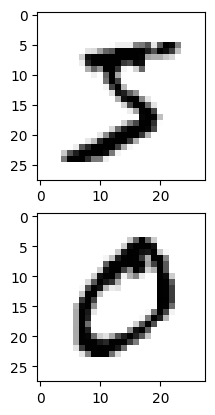

In [ ]:
##################################
#Part(f): MNIST Digit classification using KNN classifier
##################################

#Load MNIST data
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')
images = mnist.data.to_numpy()
targets = mnist.target.to_numpy().astype(int)  # Convert to integers for indexing

#Plot a few images
plt.subplot(211)
plt.imshow((images[0].reshape(28,28)), cmap=plt.cm.gray_r, interpolation='nearest')
plt.subplot(212)
plt.imshow(images[1].reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')

#Create train, validation and test splits
np.random.seed(42)
num_samples = images.shape[0]
shuffled_indices = np.random.permutation(num_samples)

# Reduce dataset size for efficiency
train_size, val_size, test_size = 2000, 500, 500
train_indices = shuffled_indices[:train_size]
val_indices = shuffled_indices[train_size:train_size+val_size]
test_indices = shuffled_indices[train_size+val_size:train_size+val_size+test_size]

X_train, y_train = images[train_indices], targets[train_indices]
X_val, y_val = images[val_indices], targets[val_indices]
X_test, y_test = images[test_indices], targets[test_indices]

print(f"Training set: {X_train.shape}, Validation set: {X_val.shape}, Test set: {X_test.shape}")

#Write 'MultiClassKNNClassify' function
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def manhattan_distance(a, b):
    return np.sum(np.abs(a - b))

def MultiClassKNNClassify(X_train, y_train, X_test, k=3, metric='l2'):
    y_pred = []
    for test_point in X_test:
        if metric == 'l2':
            dists = np.array([euclidean_distance(test_point, train_point) for train_point in X_train])
        elif metric == 'l1':
            dists = np.array([manhattan_distance(test_point, train_point) for train_point in X_train])
        else:
            raise ValueError("Unsupported distance metric")

        k_indices = np.argpartition(dists, k)[:k]  # More efficient than argsort
        k_nearest_labels = y_train[k_indices]

        unique, counts = np.unique(k_nearest_labels, return_counts=True)
        y_pred.append(unique[np.argmax(counts)])

    return np.array(y_pred)

#Empirically chose most suitable k and distance metric based on the evaluation on cross-validation data
best_k, best_metric, best_acc = None, None, 0
for k in [1, 3, 5, 7]:
    for metric in ['l1', 'l2']:
        y_val_pred = MultiClassKNNClassify(X_train, y_train, X_val, k=k, metric=metric)
        acc = np.mean(y_val == y_val_pred)  # Replaces accuracy_score
        print(f"k={k}, metric={metric}, validation accuracy={acc:.4f}")
        if acc > best_acc:
            best_k, best_metric, best_acc = k, metric, acc

#Evaluate the performance on test data with the best hyper parameters ( k, distance metric ) obtained from cross validation
y_test_pred = MultiClassKNNClassify(X_train, y_train, X_test, k=best_k, metric=best_metric)
test_acc = np.mean(y_test == y_test_pred)
print(f"Best k: {best_k}, Best metric: {best_metric}, Test accuracy: {test_acc:.4f}")

#Create a confusion matrix for test data
#Inputs: Ground truth labels and classifier predictions
    #Outputs: Confusion matrix
    #Confusion matrix: A confusion matrix is a table that summarizes the performance of a classification model by comparing its predictions to the actual ground truth values
    #Rows: Represent the actual class labels
    #Columns: Represent the predicted class labels
def compute_confusion_matrix(true, pred):
    num_classes = len(np.unique(true))  # Number of unique labels
    matrix = np.zeros((num_classes, num_classes), dtype=int)

    for t, p in zip(true, pred):
        matrix[t, p] += 1  # Increment the count

    return matrix

conf_matrix = compute_confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n", conf_matrix)

#Suggest an alternative ways to improve performance
# 1. Apply Principal Component Analysis (PCA) to reduce features from 784 to a lower number (e.g., 100-200).
# 2. Extract edge features instead of raw pixel values to improve classification.
# 3. Assign higher weights to closer neighbors instead of treating all neighbors equally.
# 4. Try different distance metrics







<b> Report your observations </b>
1. Write down the best accuracy on synthetic test data generated from Gaussian distribution
*   The highest accuracy achieved on the synthetic test dataset (generated from a Gaussian distribution) was 89.8%.
*   The choice of k and distance metric significantly influenced the classification performance.

2. Write down the best accuracy on MNIST validation and test data.

*   Best Validation Accuracy: 0.9020 (k=1, L2 distance).
*   Best Test Accuracy: 0.8980 (k=1, L2 distance).

These results indicate that L2  distance performed better than L1 , and a lower k value (k=1) worked best for this dataset.


3. Report your observations on the confusion matrix of KNN classifier on MNIST test data


1.   Well-Classified Digits:

  Digits 0, 1, and 6 had very high classification accuracy with minimal confusion.

*   Digit 0: 53/54 correct predictions.
*   Digit 1: 61/62 correct predictions.



2.   Misclassified Digits:


*   Digit 8 was confused with digit 3 (5 misclassifications).
*   Digit 5 was confused with digit 3 (3 misclassifications).
*   Digit 7 was confused with digits 2 and 9.
*   Digit 4 had some misclassification with digit 9.







